In [19]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from __future__ import print_function

## Basic autograd

In [3]:
x = Variable(torch.Tensor([1]), requires_grad=True)
w = Variable(torch.Tensor([2]), requires_grad=True)
b = Variable(torch.Tensor([3]), requires_grad=True)

# Build a computational graph
y = w * x + b

# Compute gradients.
y.backward()

In [4]:
# print out the gradients.
print(x.grad.data)
print(w.grad.data)
print(b.grad.data)


 2
[torch.FloatTensor of size 1]


 1
[torch.FloatTensor of size 1]


 1
[torch.FloatTensor of size 1]



In [5]:
# Sample data for linear model y = w * x +  b
x = Variable(torch.rand(30, 2))
w = Variable(torch.Tensor([2, 3]).view(2, -1))
y = torch.mm(x, w) + 1.0

In [6]:
y[:5]

Variable containing:
 1.6921
 3.8060
 3.7515
 4.8494
 5.3382
[torch.FloatTensor of size 5x1]

In [7]:
linear = nn.Linear(2, 1)
print('w: ', linear.weight.data)
print('b: ',linear.bias.data)

w:  
 0.5040 -0.4051
[torch.FloatTensor of size 1x2]

b:  
 0.6890
[torch.FloatTensor of size 1]



In [8]:
# Build Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [9]:
# forward propagation
pred = linear(x)

In [10]:
# compute loss
loss = criterion(pred, y)
print('loss:', loss.data[0])

# backpropagation
loss.backward()

loss: 8.751127243041992


In [11]:
# Gradients
print('dL/dw', linear.weight.grad)
print('dL/db', linear.bias.grad)

dL/dw Variable containing:
-3.0015 -3.3085
[torch.FloatTensor of size 1x2]

dL/db Variable containing:
-5.6157
[torch.FloatTensor of size 1]



In [12]:
# optimization
optimizer.step()

# Print out the loss after optimization.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.data[0])
linear.zero_grad()
loss.backward()

print('w: ', linear.weight.data)
print('b: ', linear.bias.data)

loss after 1 step optimization:  8.244101524353027
w:  
 0.5340 -0.3720
[torch.FloatTensor of size 1x2]

b:  
 0.7452
[torch.FloatTensor of size 1]



## Input pipeline

In [13]:
# Download and construct dataset
train_dataset = dsets.CIFAR10(root='../../data/', 
                              train=True, 
                              transform=transforms.ToTensor(), 
                              download=True)

Files already downloaded and verified


In [14]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4)

In [15]:
images, labels = next(iter(train_loader))

In [17]:
class_names = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

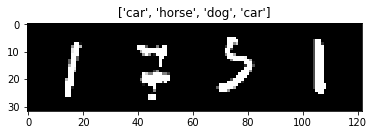

In [48]:
def imshow(img, title=None, mean=0, std=1):
    npimg = img.numpy().transpose((1, 2, 0))
    npimg = std * npimg + mean
    npimg = np.clip(npimg, 0, 1)
    plt.imshow(npimg)
                                  
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
                                  
out = torchvision.utils.make_grid(images)
                                  
imshow(out, title=[class_names[x] for x in labels])

In [23]:
print(label)

6


In [25]:
# Data Loader
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=10,
                                           shuffle=True,
                                           num_workers=2)

data_iter = iter(train_loader)

In [27]:
images, labels = data_iter.next()

## Logistic Regression with MNIST

In [114]:
# Hyper parameters
input_size = 28 * 28
output_size = 10
num_epoches = 5
batch_size = 100
learning_rate = 0.001

In [115]:
# load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = dsets.MNIST(root='../../data/', 
                            train=True, 
                            download=True,
                            transform=transform)
test_dataset = dsets.MNIST(root='../../data/', 
                           train=False,
                           transform=transform)

In [116]:
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True, 
                                           num_workers=2)

test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False, 
                                          num_workers=2)

In [117]:
train_dataset.train_data.size()

torch.Size([60000, 28, 28])

In [118]:
images, labels = next(iter(train_loader))

In [119]:
print(labels.view(4,1))

RuntimeError: invalid argument 2: size '[4 x 1]' is invalid for input of with 100 elements at /opt/conda/conda-bld/pytorch_1503970438496/work/torch/lib/TH/THStorage.c:41

In [55]:
batch_size = 4
nb_digits = 10

# Dummy input that HAS to be 2D for the scatter (you can use view(-1,1) if needed)
y = torch.LongTensor(batch_size,1).random_() % nb_digits

# One hot encoding buffer that you create out of the loop and just keep reusing
y_onehot = torch.FloatTensor(batch_size, nb_digits)

# In your for loop
y_onehot.zero_()
y_onehot.scatter_(1, y, 1)

print(y)
print(y_onehot)


 9
 5
 3
 9
[torch.LongTensor of size 4x1]


    0     0     0     0     0     0     0     0     0     1
    0     0     0     0     0     1     0     0     0     0
    0     0     0     1     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     1
[torch.FloatTensor of size 4x10]



In [58]:
labels_onehot = torch.FloatTensor(batch_size, 10)
labels_onehot.zero_()
labels_onehot.scatter_(1, labels.view(4, 1), 1)
labels_onehot


    0     1     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     1     0     0
    0     0     0     0     0     1     0     0     0     0
    0     1     0     0     0     0     0     0     0     0
[torch.FloatTensor of size 4x10]

In [65]:
labels.size()

torch.Size([4])

In [68]:
def one_hot(labels, num_classes):
    out = torch.zeros(labels.size(0), num_classes)
    out.scatter_(1, labels, 1)
    return out

In [70]:
one_hot(labels.view(4, 1), 10)


    0     1     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     1     0     0
    0     0     0     0     0     1     0     0     0     0
    0     1     0     0     0     0     0     0     0     0
[torch.FloatTensor of size 4x10]

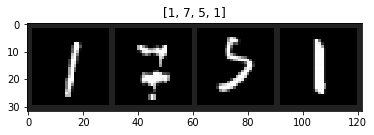

In [50]:
# visualize the first batch
out = torchvision.utils.make_grid(images)

mean = np.array([0.1307])
std = np.array([0.3081])

imshow(out, title=[x for x in labels], mean=mean, std=std)

In [127]:
# train model
for epoch in range(num_epoches):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        
        # convert labels to one-hot
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epoches, i+1, len(train_dataset)//batch_size, loss.data[0]))

Epoch: [1/5], Step: [100/600], Loss: 0.7608
Epoch: [1/5], Step: [200/600], Loss: 0.7951
Epoch: [1/5], Step: [300/600], Loss: 0.6894
Epoch: [1/5], Step: [400/600], Loss: 0.7069
Epoch: [1/5], Step: [500/600], Loss: 0.6831
Epoch: [1/5], Step: [600/600], Loss: 0.5926
Epoch: [2/5], Step: [100/600], Loss: 0.5411
Epoch: [2/5], Step: [200/600], Loss: 0.6031
Epoch: [2/5], Step: [300/600], Loss: 0.6395
Epoch: [2/5], Step: [400/600], Loss: 0.4704
Epoch: [2/5], Step: [500/600], Loss: 0.5185
Epoch: [2/5], Step: [600/600], Loss: 0.6638
Epoch: [3/5], Step: [100/600], Loss: 0.4431
Epoch: [3/5], Step: [200/600], Loss: 0.5194
Epoch: [3/5], Step: [300/600], Loss: 0.4523
Epoch: [3/5], Step: [400/600], Loss: 0.5012
Epoch: [3/5], Step: [500/600], Loss: 0.4002
Epoch: [3/5], Step: [600/600], Loss: 0.4196
Epoch: [4/5], Step: [100/600], Loss: 0.4130
Epoch: [4/5], Step: [200/600], Loss: 0.3948
Epoch: [4/5], Step: [300/600], Loss: 0.2985
Epoch: [4/5], Step: [400/600], Loss: 0.4532
Epoch: [4/5], Step: [500/600], L